In [1]:
%matplotlib inline

In [2]:
import pandas_ml as pdml

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)

In [4]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic = pdml.ModelFrame(titanic, target='survived')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
tips = sns.load_dataset("tips")
tips = pdml.ModelFrame(tips, target='total_bill')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
iris = sns.load_dataset("iris")
iris = pdml.ModelFrame(iris, target='species')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## stripplot

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


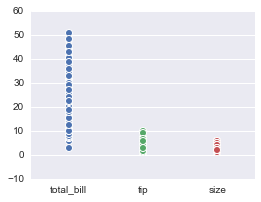

In [7]:
tips.sns.stripplot();

Specifying ``x`` keyword vertically plots ``target`` values categorized by ``x`` values.

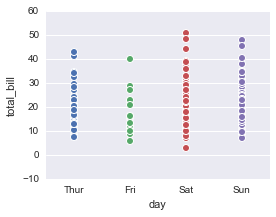

In [8]:
tips.sns.stripplot(x="day");

Specifying ``y`` keyword horizontally plots ``target`` values categorized by ``y`` values.

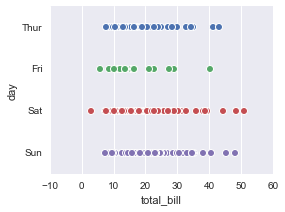

In [9]:
tips.sns.stripplot(y="day");

You can specify both ``x`` and ``y`` to show intended plots. 

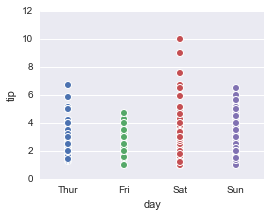

In [10]:
tips.sns.stripplot(x="day", y='tip');

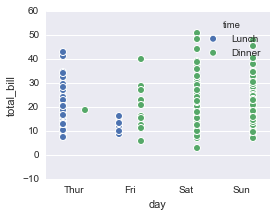

In [11]:
tips.sns.stripplot(x="day", hue="time");

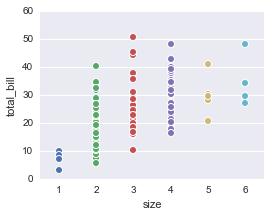

In [12]:
tips.sort_values("size").sns.stripplot(x="size");

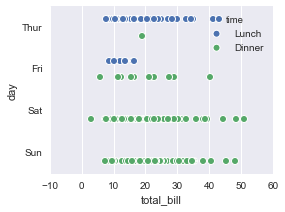

In [13]:
tips.sns.stripplot(y="day", hue="time");

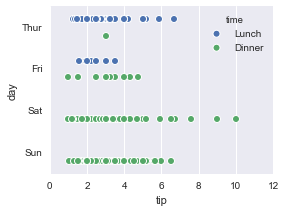

In [14]:
tips.sns.stripplot(x='tip', y="day", hue="time");

## boxplot

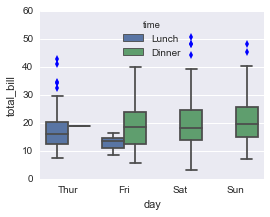

In [15]:
tips.sns.boxplot(x="day", hue="time");

## violinplot

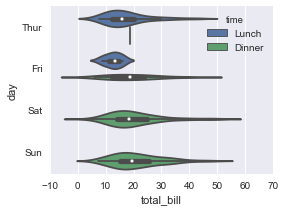

In [16]:
tips.sns.violinplot(y="day", hue="time");

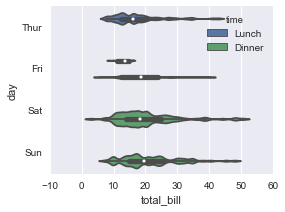

In [17]:
tips.sns.violinplot(y="day", hue="time", bw=.1,
                    scale="count", scale_hue=False);

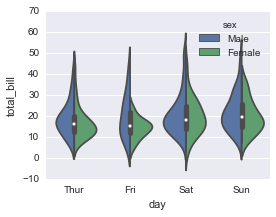

In [18]:
tips.sns.violinplot(x="day", hue="sex", split=True);

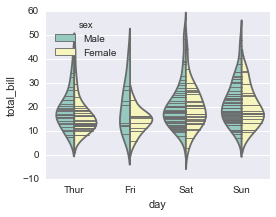

In [19]:
tips.sns.violinplot(x="day", hue="sex", split=True,
                    inner="stick", palette="Set3");

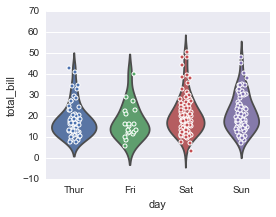

In [20]:
tips.sns.violinplot(x="day", inner=None)
tips.sns.stripplot(x="day", jitter=True, size=4);

## barplot

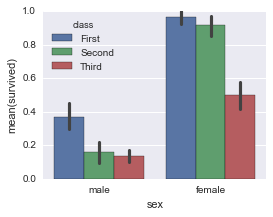

In [21]:
titanic.sns.barplot(x="sex", hue="class");

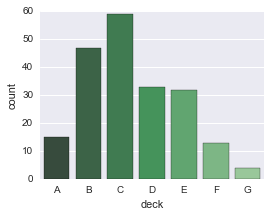

In [22]:
titanic.sns.countplot(x='deck', palette="Greens_d");

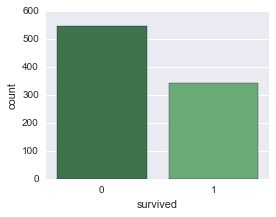

In [23]:
titanic.sns.countplot(palette="Greens_d");

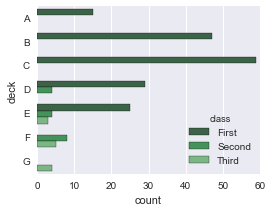

In [24]:
titanic.sns.countplot(y="deck", hue="class", palette="Greens_d");

## pointplot

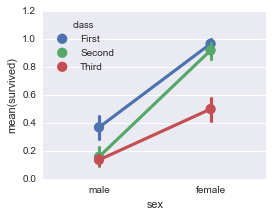

In [25]:
titanic.sns.pointplot(x="sex", hue="class");

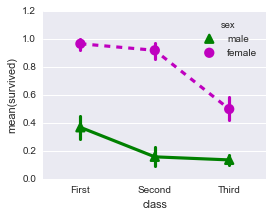

In [26]:
titanic.sns.pointplot(x="class", hue="sex",
                      palette={"male": "g", "female": "m"},
                      markers=["^", "o"], linestyles=["-", "--"]);

## Drawing multi-panel categorical plots

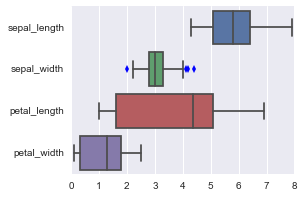

In [27]:
iris.sns.boxplot(orient="h");

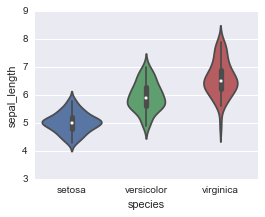

In [28]:
iris.sns.violinplot(x='species', y='sepal_length');

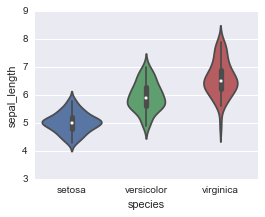

In [29]:
iris.sns.violinplot(y='sepal_length');

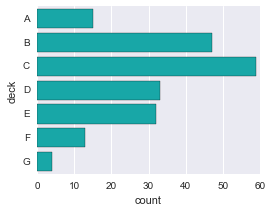

In [30]:
titanic.sns.countplot(y="deck", color="c");

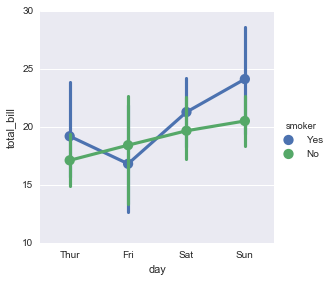

In [31]:
tips.sns.factorplot(x="day", hue="smoker");

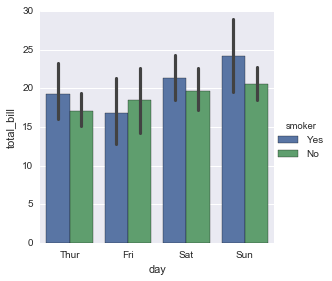

In [32]:
tips.sns.factorplot(x="day", hue="smoker", kind="bar");

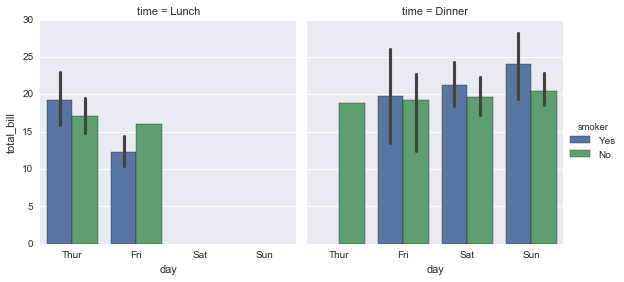

In [33]:
tips.sns.factorplot(x="day", hue="smoker", col="time", kind="bar");

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


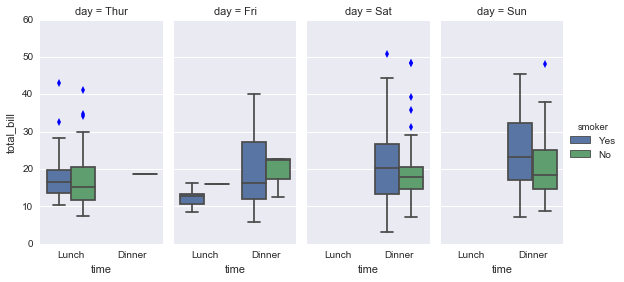

In [34]:
tips.sns.factorplot(x="time", hue="smoker", col="day",
                    kind="box", size=4, aspect=.5);

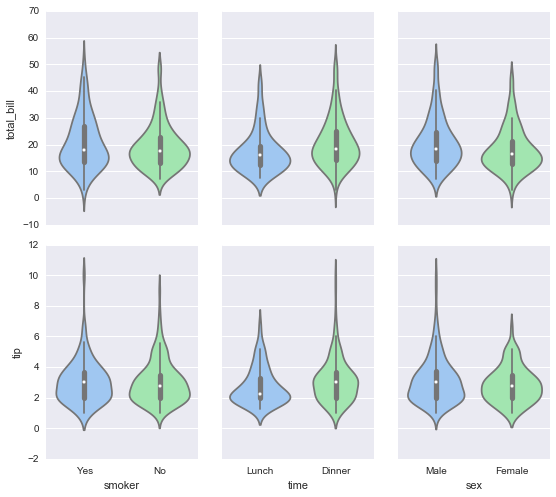

In [35]:
g = tips.sns.PairGrid(x_vars=["smoker", "time", "sex"],
                      y_vars=["total_bill", "tip"],
                      aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");